# Multiple Linear Regression
1. Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.
2. Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.
3. For MLR, the dependent or target variable(Y) must be the continuous/real, but the predictor or independent variable may be of continuous or categorical form. Each feature variable must model the linear relationship with the dependent variable. MLR tries to fit a regression line through a multidimensional space of data-points.

# Multiple Linear Regression startups Problem Statement 
1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

# Business Objactive  : 
Goal is to create a model that can easily determine which company has a maximum profit, and which is the most affecting factor for the profit of a company.
# Bussiness contraints: 
Minimize the affecting factor 

In [1]:
# Importing the required library  which are helps to bilding the model  
import numpy as np # for mathematical and logical operations and consisting of multidimensional array objects 
import pandas as pd # for Data Manipulation
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

In [2]:
#lets loading the data set 
start = pd.read_csv("50_Startups.csv")
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Preprocessing

In [3]:
#lets rename the variables for better understanding
start = start.rename(columns={'R&D Spend':'R_D_Spend' , 'Marketing Spend':'Marketing_Spend'})
start

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

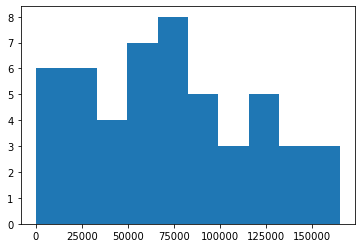

In [4]:
plt.hist(start.R_D_Spend) #histogram Checking the data from R_D_spend columns is normally distributed or not

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa9e489670>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa9e489d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa9e489310>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa9e496430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa9e496790>],
 'means': []}

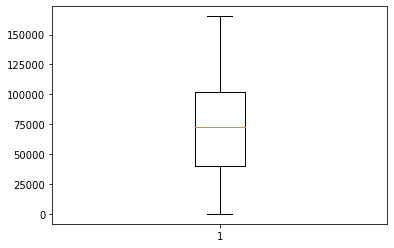

In [5]:
plt.boxplot(start.R_D_Spend) #boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa9e59a7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa9e59ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa9e59a4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa9e5a8580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa9e5a88e0>],
 'means': []}

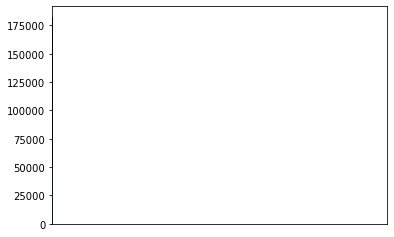

In [6]:
# Administration
plt.bar(height = start.Administration, x = np.arange(1, 51, 1))
plt.hist(start.Administration) #histogram
plt.boxplot(start.Administration) #boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa9e696d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa9e6a7430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa9e696a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa9e6a7af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa9e6a7e50>],
 'means': []}

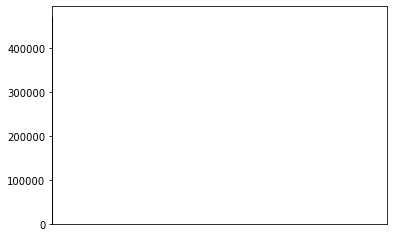

In [7]:
#Marketing_Spend
plt.bar(height= start.Marketing_Spend, x=np.arange(1,51,1))
plt.hist(start.Marketing_Spend)
plt.boxplot(start.Marketing_Spend)

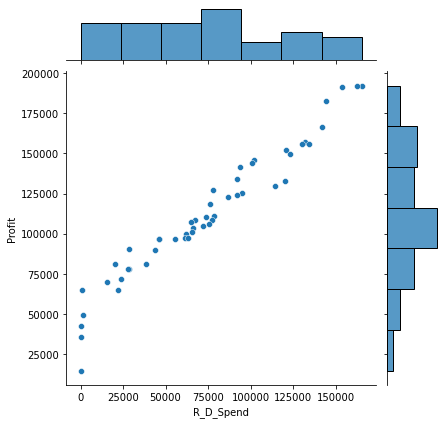

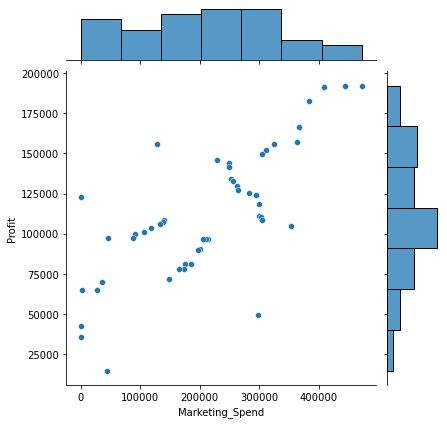

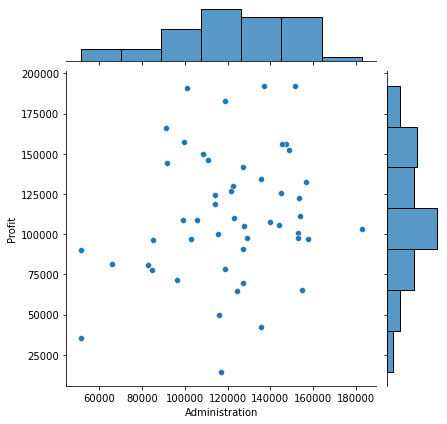

In [8]:

#Seaborn is a library for making statistical graphics and Seaborn helps to explore and understand the data
import seaborn as sns 
# Jointplot :  a plot of two variables with bivariate and univariate graphs. 
# This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds
sns.jointplot(x=start['R_D_Spend'], y=start['Profit'])
sns.jointplot(x=start['Marketing_Spend'], y=start['Profit'])
sns.jointplot(x=start['Administration'], y=start['Profit'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration', ylabel='count'>

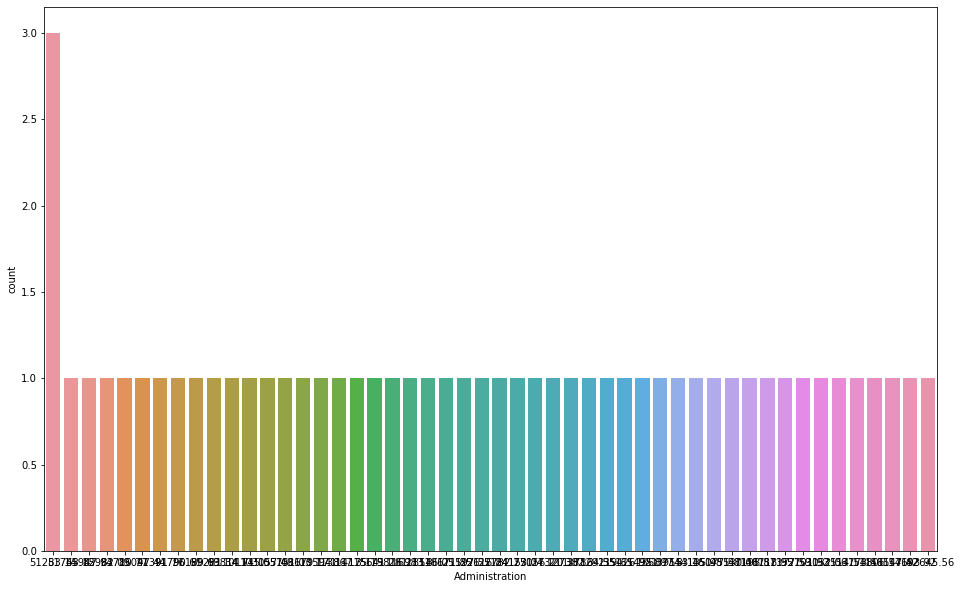

In [9]:
# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(start['R_D_Spend'])
sns.countplot(start['Marketing_Spend'])
sns.countplot(start['Administration'])

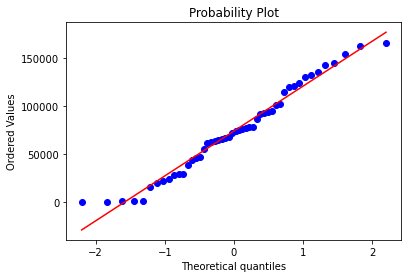

In [11]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(start.R_D_Spend, dist = "norm", plot = pylab)
plt.show()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


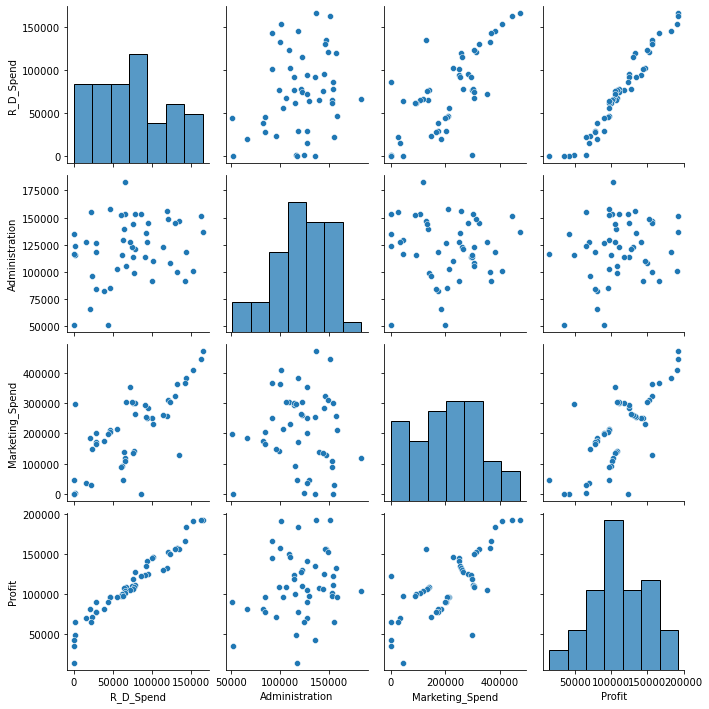

In [12]:
# Scatter plot between the variables along with histograms
import seaborn as sns #for Advanced visualizations
sns.pairplot(start.iloc[:, :])                          
# Correlation matrix 
start.corr()

In [19]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
ml1 = smf.ols('Profit ~ R_D_Spend + Marketing_Spend + Administration', data = start).fit() # regression model
ml1

In [20]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        13:39:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

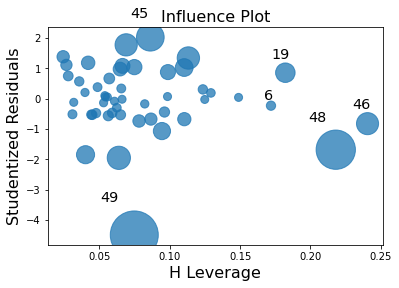

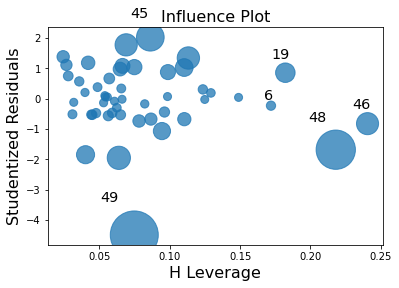

In [21]:
# p-values for Marketing_Spend, Administration are more than 0.05
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)

In [23]:
# Studentized Residuals = Residual/standard deviation of residuals
# index 49 is showing high influence so we can exclude that entire row
start_new = start.drop(start.index[[49]])
start_new

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
# Preparing model                  
ml_new = smf.ols('Profit ~ R_D_Spend + Marketing_Spend + Administration', data = start_new).fit()    
# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           8.85e-32
Time:                        13:40:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
R_D_Spend           0.7830      0.038     20.470      0.000       0.706       0.860
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_rd = smf.ols('R_D_Spend ~ Marketing_Spend + Administration', data = start).fit().rsquared  
vif_rd = 1/(1 - rsq_rd) 

rsq_ms = smf.ols('Marketing_Spend ~ R_D_Spend+ Administration', data = start).fit().rsquared  
vif_ms = 1/(1 - rsq_ms)

rsq_ad = smf.ols('Administration ~ R_D_Spend+ Marketing_Spend', data = start).fit().rsquared  
vif_ad = 1/(1 - rsq_ad) 

In [26]:
# Storing vif values in a data frame
d1 = {'Variables':['R_D_Spend','Marketing_Spend','Administration'], 'VIF':[vif_rd, vif_ms, vif_ad]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D_Spend,2.468903
1,Marketing_Spend,2.326773
2,Administration,1.175091


In [27]:
# As R_D_Spend is having highest VIF value, we are going to drop this from the prediction model
# Final model
final_ml = smf.ols('Profit ~ Marketing_Spend + Administration', data = start).fit()
final_ml.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           2.50e-10
Time:                        13:41:45   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

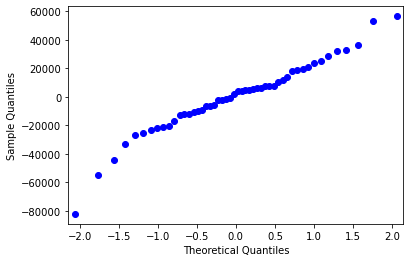

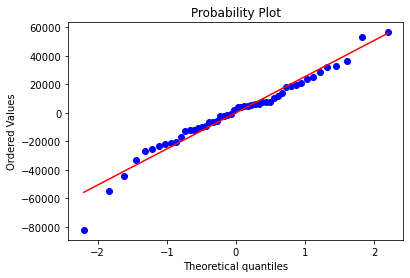

In [28]:
# Prediction
pred = final_ml.predict(start)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

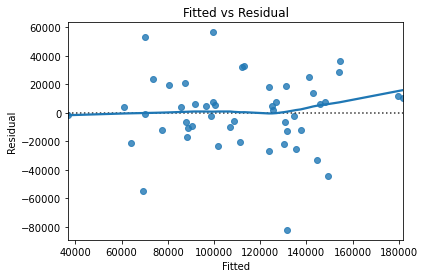

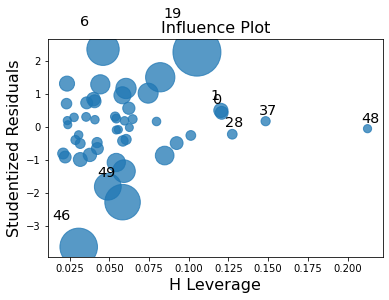

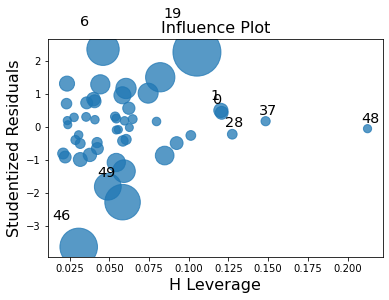

In [29]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = start.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()
sm.graphics.influence_plot(final_ml)

In [22]:
X = start.iloc[:,:4]
X

,R_D_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [31]:
Y = start.iloc[:, 4]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [41]:
#Catgorical data  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
labelencoder_x= LabelEncoder()  
X.State = labelencoder_x.fit_transform(X.State)
X

,R_D_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [43]:
# Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , test_size = 0.2) # 20% test data

In [47]:
#now lets build a model using fitting Multilinear Regression to the training set
from sklearn.linear_model import LinearRegression
start_f = LinearRegression() 
start_f.fit(X_train, Y_train)

LinearRegression()

In [48]:
#prediction for the test results
y_pred = start_f.predict(X_test)
y_pred

array([ 92103.44759901, 196748.89660323,  62111.59180179, 100305.85947379,
       169036.98829929, 118090.083655  , 119842.84138788, 150410.06441284,
       155633.59730885,  55198.36194129])

In [53]:
# Finding the MAE, MSE, RMSE socre 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 9280.612887939677
MSE: 127143542.47265062
RMSE: 11275.794538419483


In [54]:
#for comarision to check whether the y_test is good or y_pred is good
#we will use r^2 score from the sklearn package
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred) 
score

0.9330108149999014

In [59]:
print('Train Score: ', start_f.score(X_train, Y_train))  
print('Test Score: ', start_f.score(X_test, Y_test))  

Train Score:  0.9499296242072688
Test Score:  0.9330108149999014
